<a href="https://colab.research.google.com/github/RofiqAulia/PCVK_Ganjil_2024/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hubungkan dengan drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import library

In [ ]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from base64 import b64decode, b64encode
import PIL
import io

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

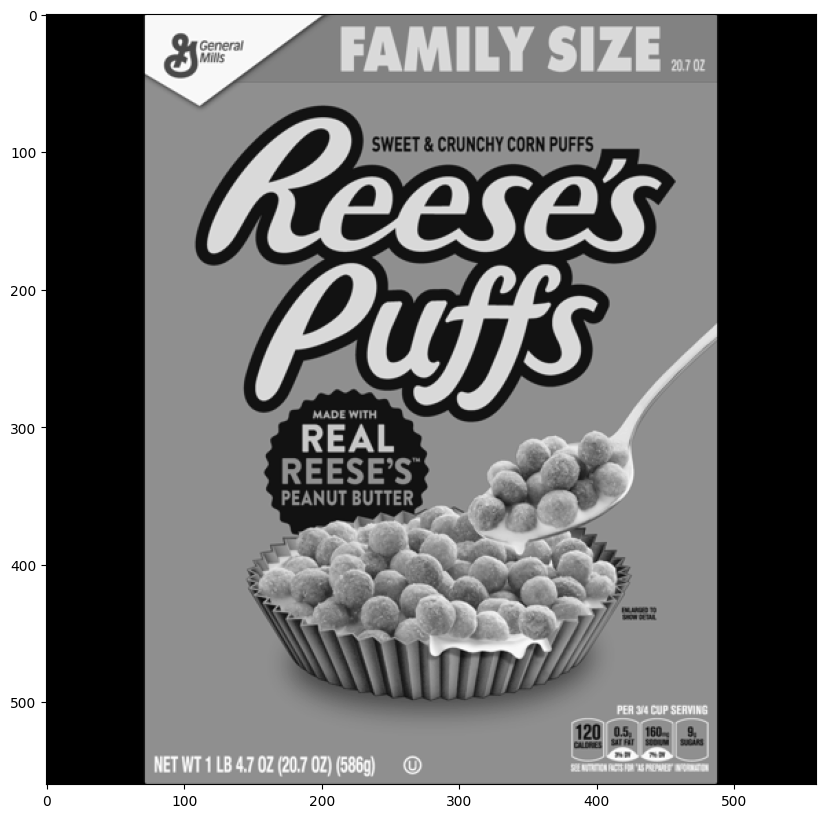

In [ ]:
reeses = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/reeses_puffs.png',0)
display(reeses)

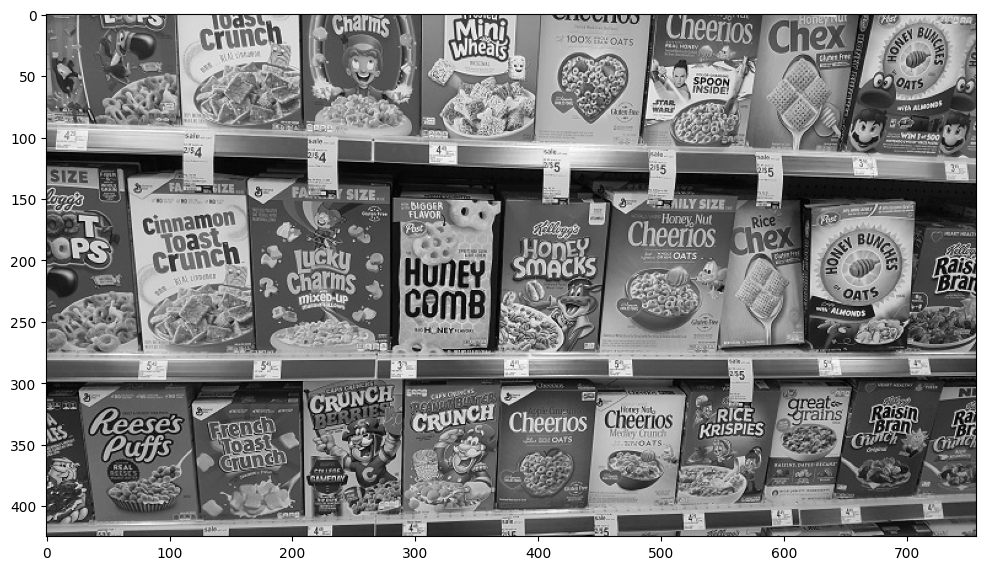

In [ ]:
cereals = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/many_cereals.jpg',0)
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [ ]:
len(matches)

139

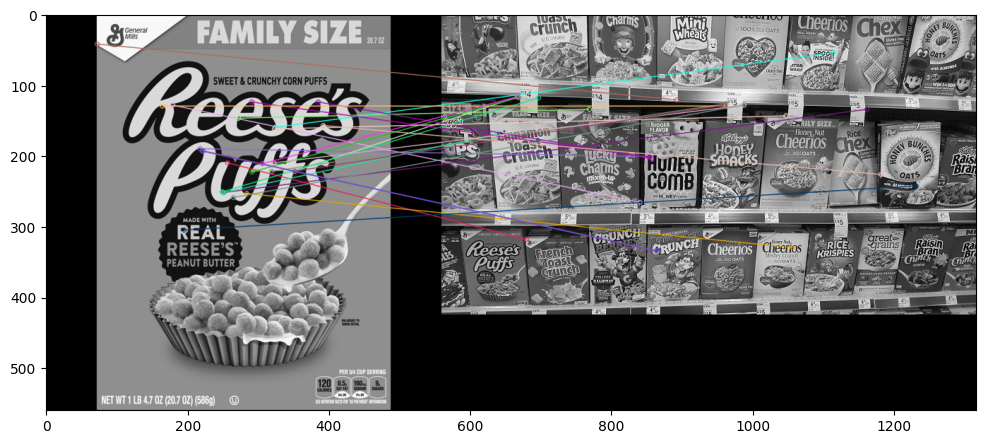

In [ ]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

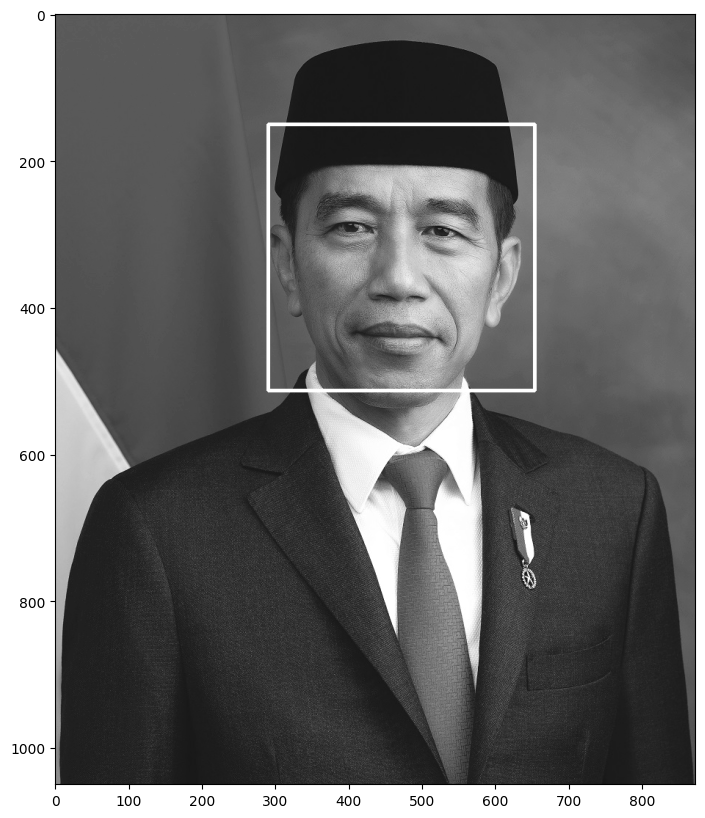

In [ ]:
jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.

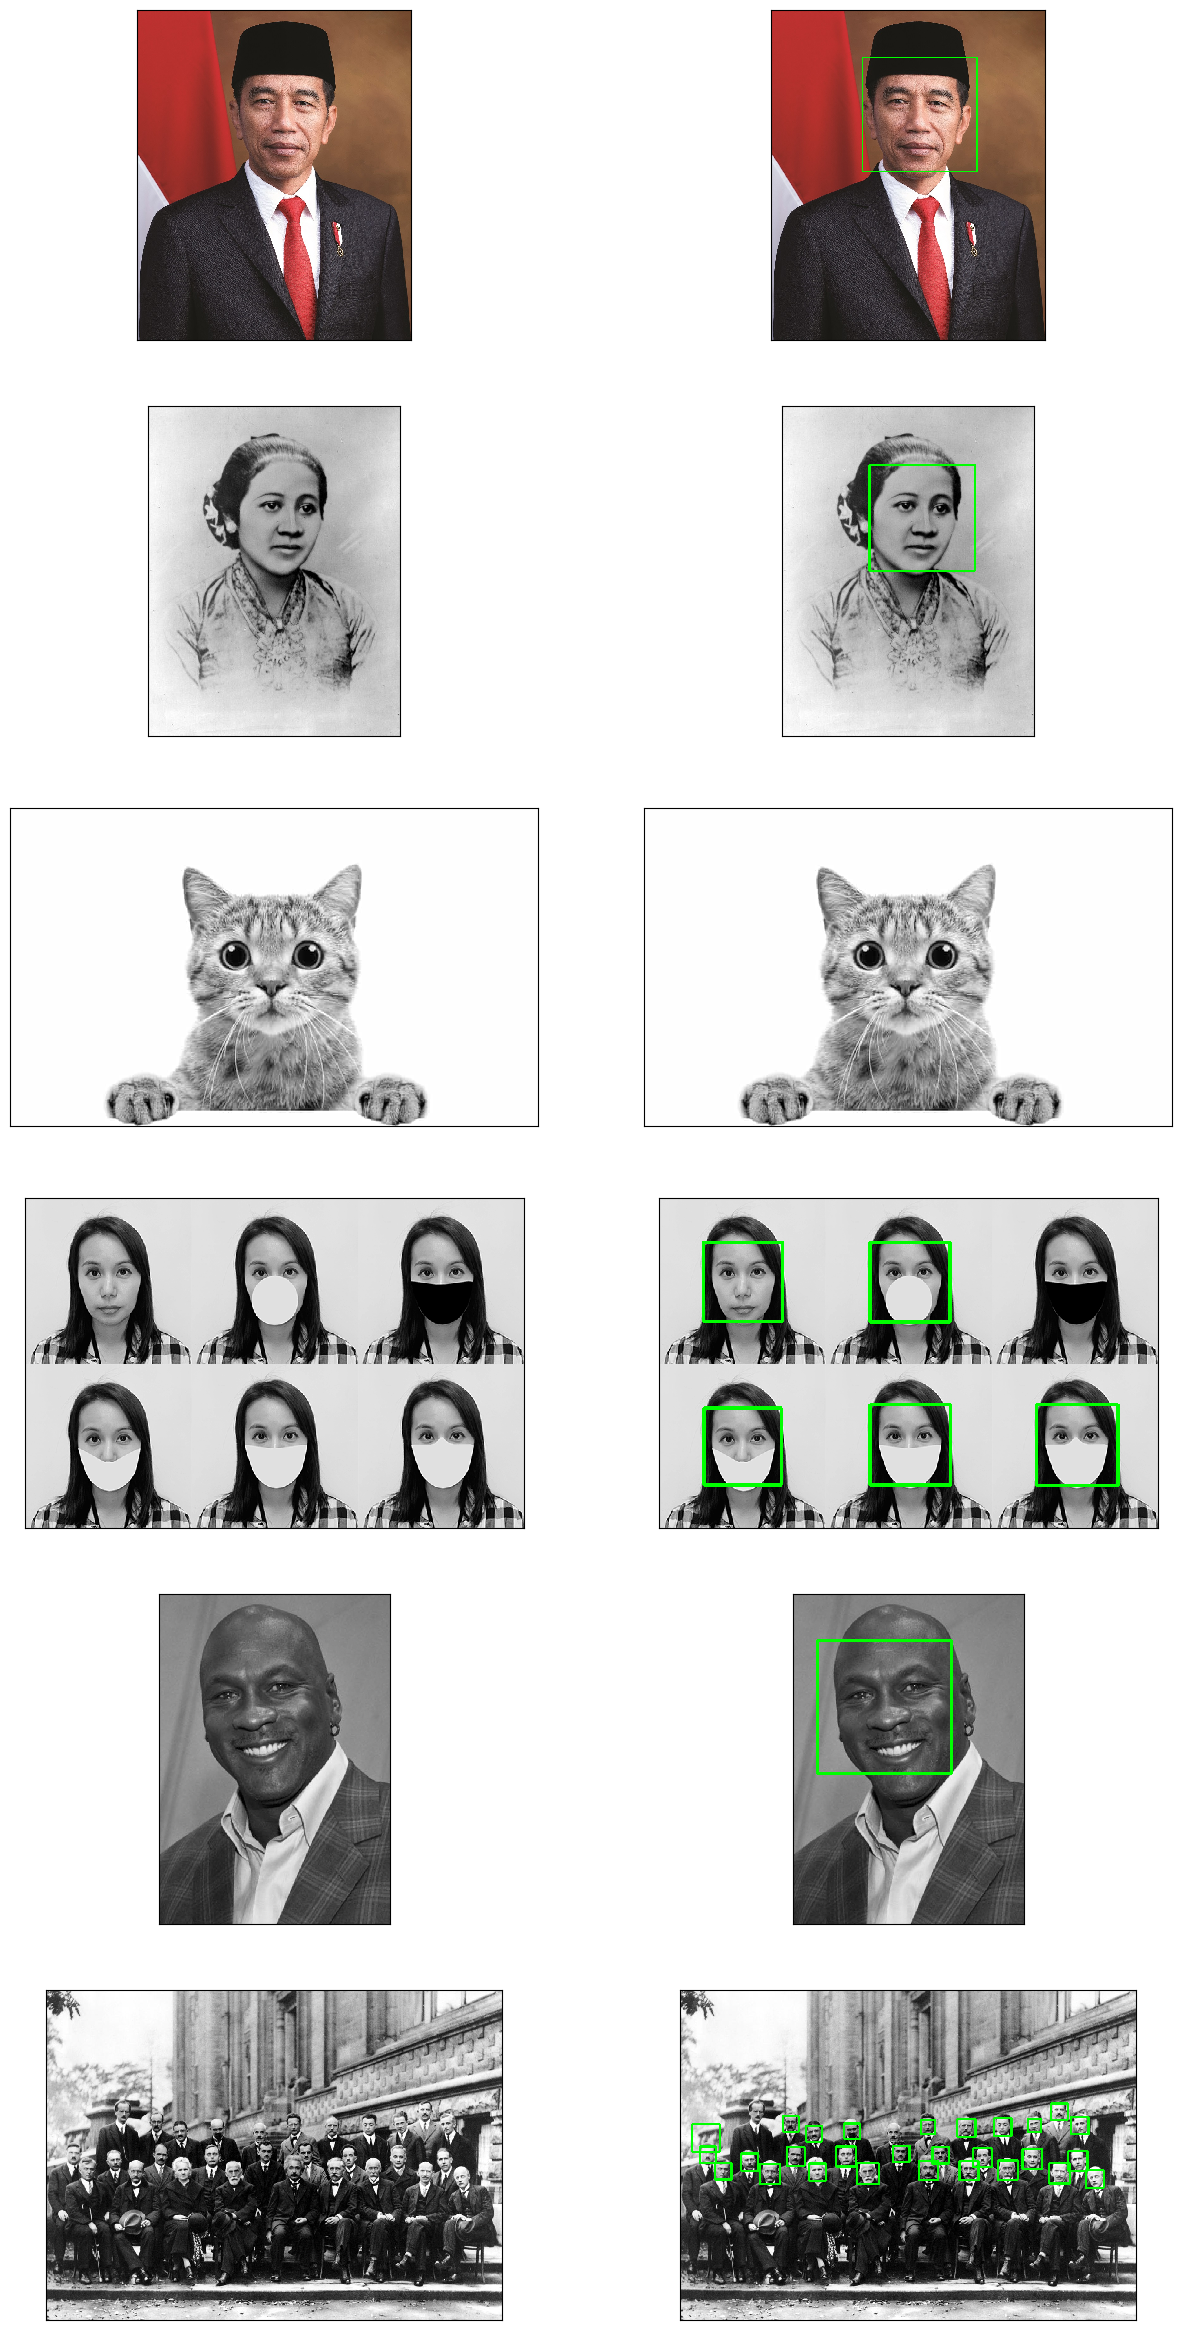

In [ ]:
def detek_wajah(img):
  img_asli = img.copy()
  img_wajah = cv.cvtColor(img_asli,cv.COLOR_RGB2GRAY)
  roi_wajah = cascade_wajah.detectMultiScale(img_wajah)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_asli,(x,y),(x+w,y+h),(0,255,0),3)
  return img_asli

jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg',0)
kucing = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg',0)
mask = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mask.png',0)
mjordan = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg',0)
solvay = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg',0)

jokowi = cv.cvtColor(jokowi,cv.COLOR_BGR2RGB)
kartini = cv.cvtColor(kartini,cv.COLOR_BGR2RGB)
kucing = cv.cvtColor(kucing,cv.COLOR_BGR2RGB)
mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
solvay = cv.cvtColor(solvay,cv.COLOR_BGR2RGB)
hasil1 = detek_wajah(jokowi)
hasil2 = detek_wajah(kartini)
hasil3 = detek_wajah(kucing)
hasil4 = detek_wajah(mask)
hasil5 = detek_wajah(mjordan)
hasil6 = detek_wajah(solvay)

images = [jokowi, hasil1, kartini, hasil2, kucing, hasil3, mask, hasil4, mjordan, hasil5, solvay, hasil6]

plt.figure(figsize = (15,30))
for i in range(len(images)):
  plt.subplot(6,2,i+1),plt.imshow(images[i], interpolation='nearest')
  plt.xticks([]),plt.yticks([])
plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

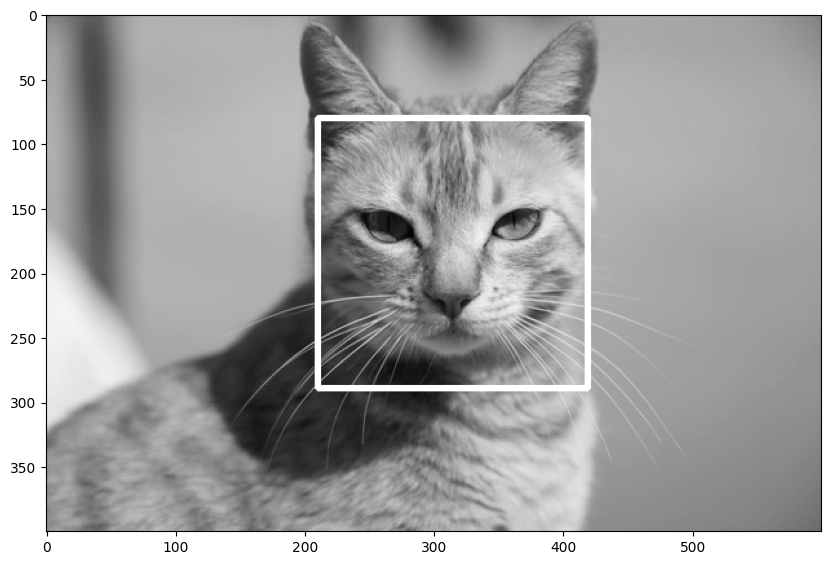

In [ ]:
cascade_kucing = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml')

kucing=[]
kucing = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg',0)
roi_kucing = cascade_kucing.detectMultiScale(kucing)
for(x,y,w,h) in roi_kucing:
  cv.rectangle(kucing,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(kucing, cmap='gray')

4. Cobakan juga untuk eyes detection.


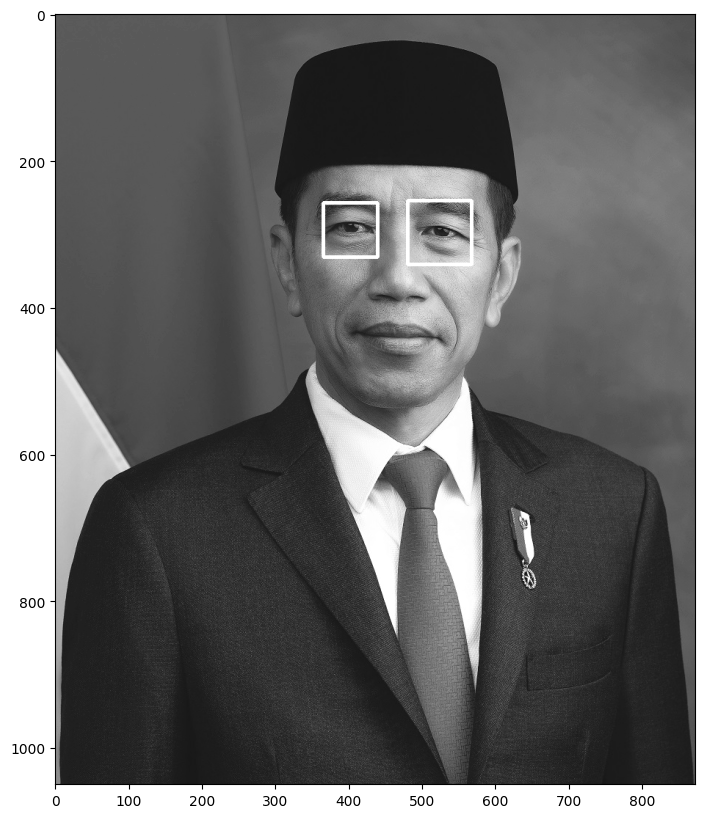

In [ ]:
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml')

jokowi=[]
jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg',0)
roi_mata = cascade_mata.detectMultiScale(jokowi)
for(x,y,w,h) in roi_mata:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

Helper Functions Below are a few helper function to make converting between different image data types and formats.

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


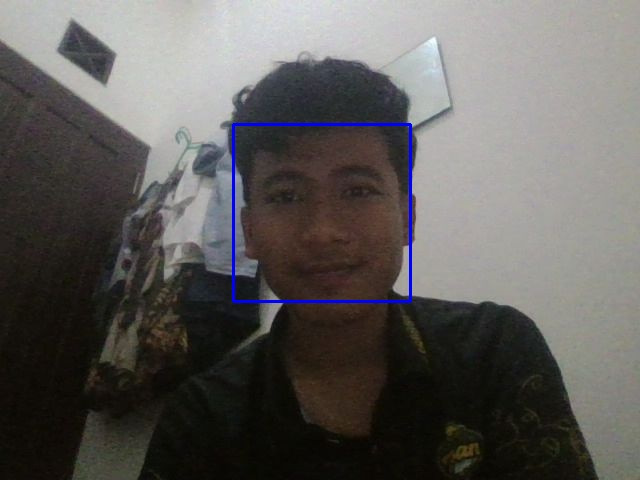

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

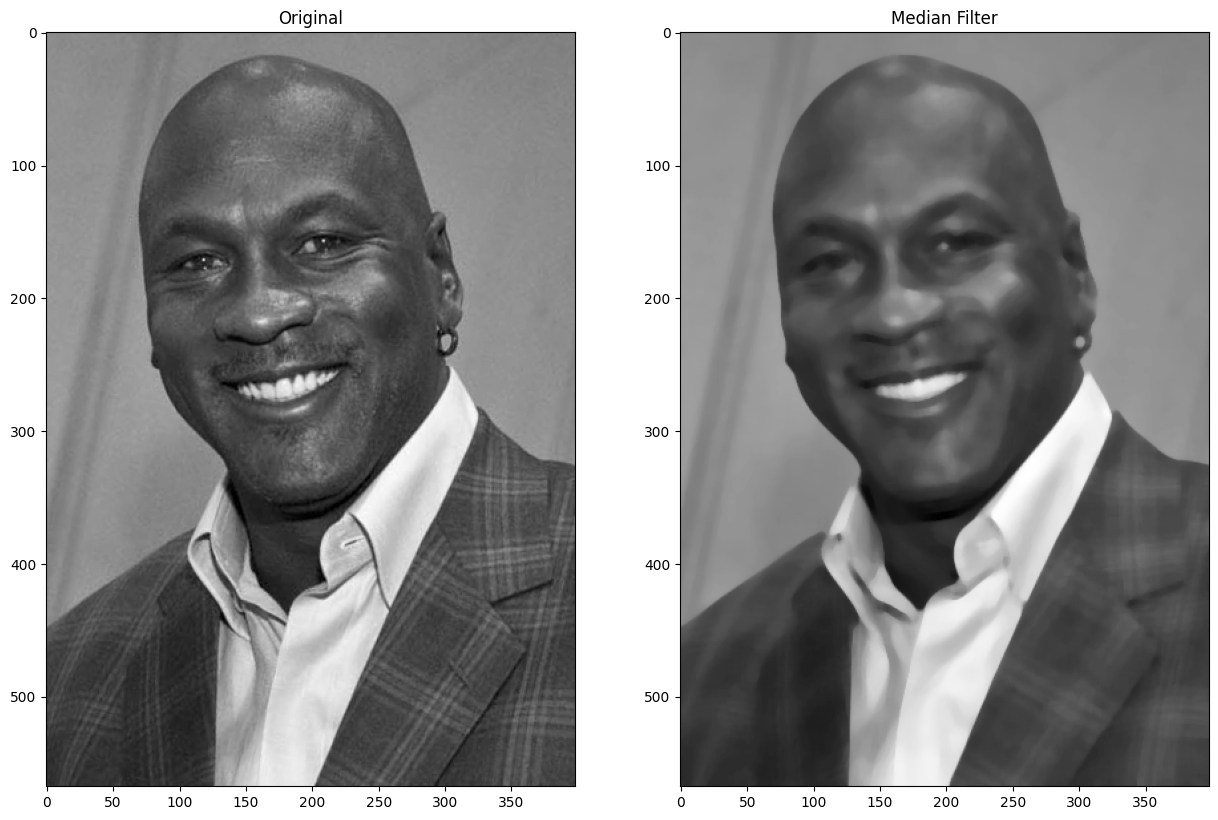

In [ ]:
mJordan = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg')
mJordan_gray = cv.cvtColor(mJordan, cv.COLOR_BGR2GRAY)
figure_size = 9

output = cv.medianBlur(mJordan_gray, figure_size)
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121), plt.imshow(mJordan_gray, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(output, cmap='gray'),plt.title('Median Filter')
plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

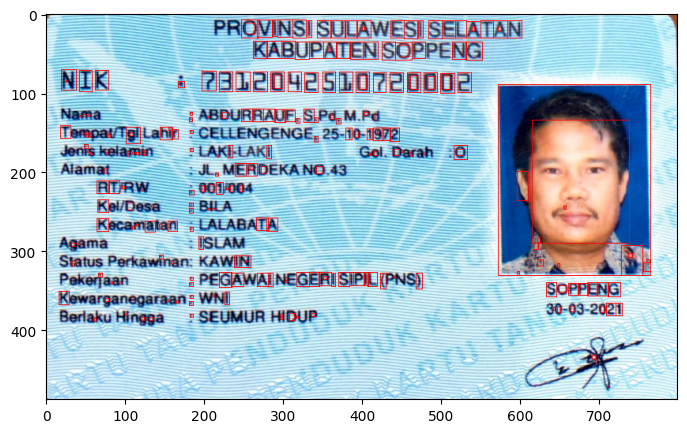

In [ ]:
import cv2

# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))


8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

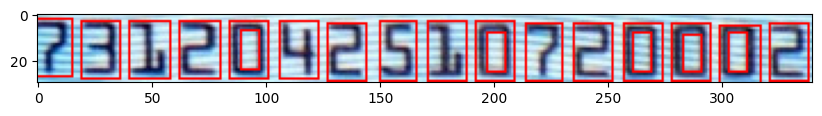

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[70:100, 200:540]

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.


In [ ]:
# Mengimpor library yang diperlukan
import os
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Memuat dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Menentukan jumlah sampel per kelas
num_samples_per_class = 100

# Menentukan digit yang akan diekstrak
digits_to_extract = list(range(10))

# Fungsi untuk mengekstrak sampel dari dataset
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Mengekstrak sampel dari dataset pelatihan
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Mengacak urutan data pelatihan
np.random.shuffle(training_data)

# Memisahkan fitur dan label
X, Y = zip(*training_data)

# Mengubah bentuk fitur menjadi (-1, 28, 28, 1)
X = np.array(X).reshape(-1, 28, 28, 1)

# Menyimpan fitur ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Menyimpan label ke file pickle dalam bentuk one-hot encoding
pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


10. Lakukan Training Data

In [ ]:
# Mengimpor library yang diperlukan
from keras.models import load_model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

# Memuat fitur dan label dari file pickle
X_train = pickle.load(open("X_mnist.pickle", "rb"))
Y_train = pickle.load(open("Y_mnist.pickle", "rb"))

# Normalisasi fitur dengan membaginya dengan 255
X_train = X_train.astype('float32') / 255

# Fungsi untuk membuat model
def create_model():
    model = Sequential()
    # Menambahkan layer ZeroPadding2D
    model.add(ZeroPadding2D((1, 1), input_shape=(28, 28, 1)))
    # Menambahkan layer Conv2D dengan 64 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Conv2D dengan 128 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Flatten untuk meratakan output sebelum memasukkannya ke layer Dense
    model.add(Flatten())
    # Menambahkan layer Dense dengan 128 neuron dan fungsi aktivasi ReLU
    model.add(Dense(128, activation='relu'))
    # Menambahkan layer Dense dengan 10 neuron (untuk 10 kelas) dan fungsi aktivasi softmax
    model.add(Dense(10, activation='softmax'))
    return model

# Membuat model
model = create_model()

# Mengompilasi model dengan optimizer Adam, loss function categorical_crossentropy, dan metrik akurasi
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data pelatihan
model.fit(X_train, Y_train, epochs=10, batch_size=128)

# Menyimpan model ke file 'mnist_model.h5'
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.2859 - loss: 2.1423
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.7364 - loss: 1.0180
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.8601 - loss: 0.4502
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.8829 - loss: 0.3428
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 0.9167 - loss: 0.2838
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.9568 - loss: 0.1750
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9588 - loss: 0.1498
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9694 - loss: 0.1042
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 451ms/step - accuracy: 0.9769 - loss: 0.0869
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.9927 - loss: 0.0458


11. Testing Data


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9915 - loss: 0.0671
Accuracy on the test set: 99.30%


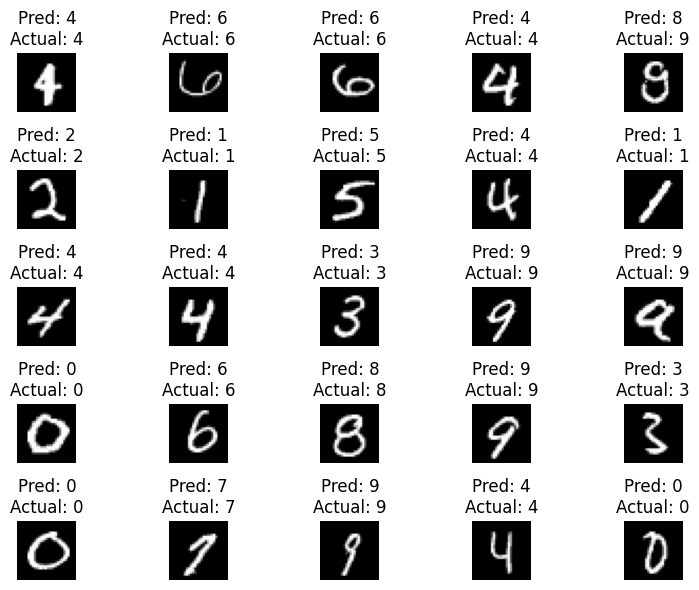

In [ ]:
# Mengimpor library yang diperlukan
from keras.utils import to_categorical

# Memuat fitur dan label dari file pickle
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi fitur dengan membaginya dengan 255
X_test = X_test / 255.0

# Memuat model yang telah dilatih sebelumnya
model = tf.keras.models.load_model("mnist_model.h5")

# Melakukan prediksi pada data uji
predictions = model.predict(X_test)

# Menghitung akurasi model pada data uji
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Menampilkan hasil prediksi pada beberapa sampel data uji
num_results_to_display = 25
fig, axes = plt.subplots(5, 5, figsize=(8, 6))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])
    img = X_test[i].reshape((28, 28))
    axes[i // 5, i % 5].imshow(img, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/u

Tugas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Memulai proses deteksi NIK...
Detected numbers: 35231606068000037

Menampilkan gambar yang telah diproses:


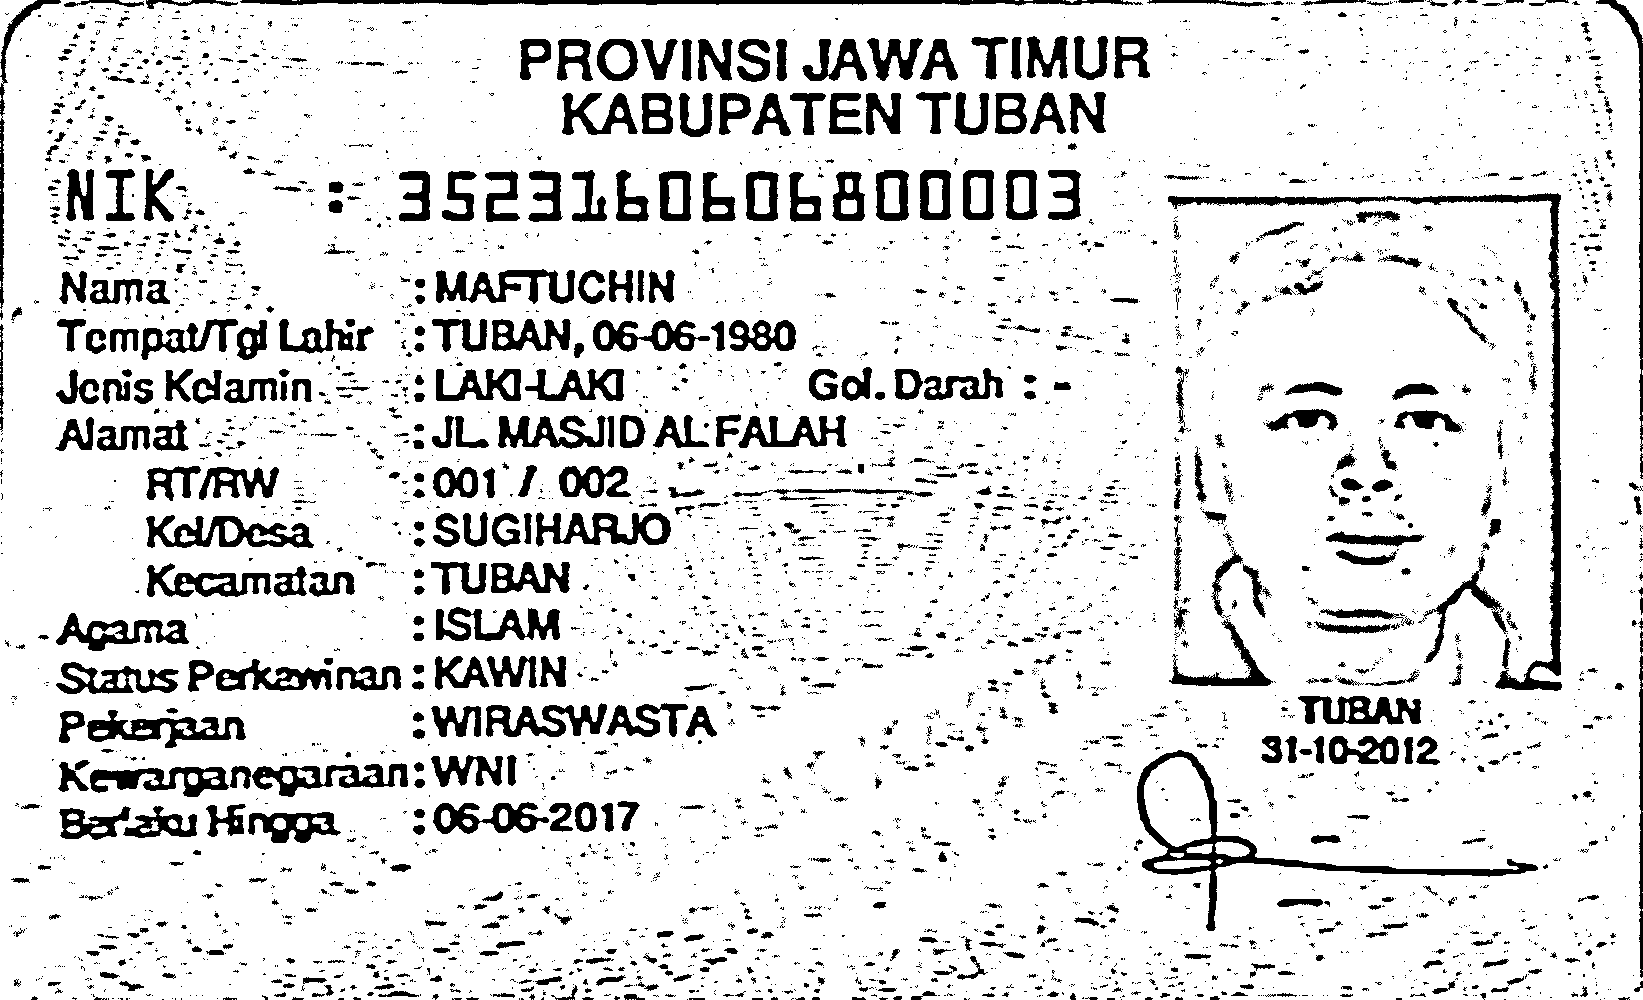


NIK terdeteksi: 3523160606800003
Menampilkan hasil deteksi:


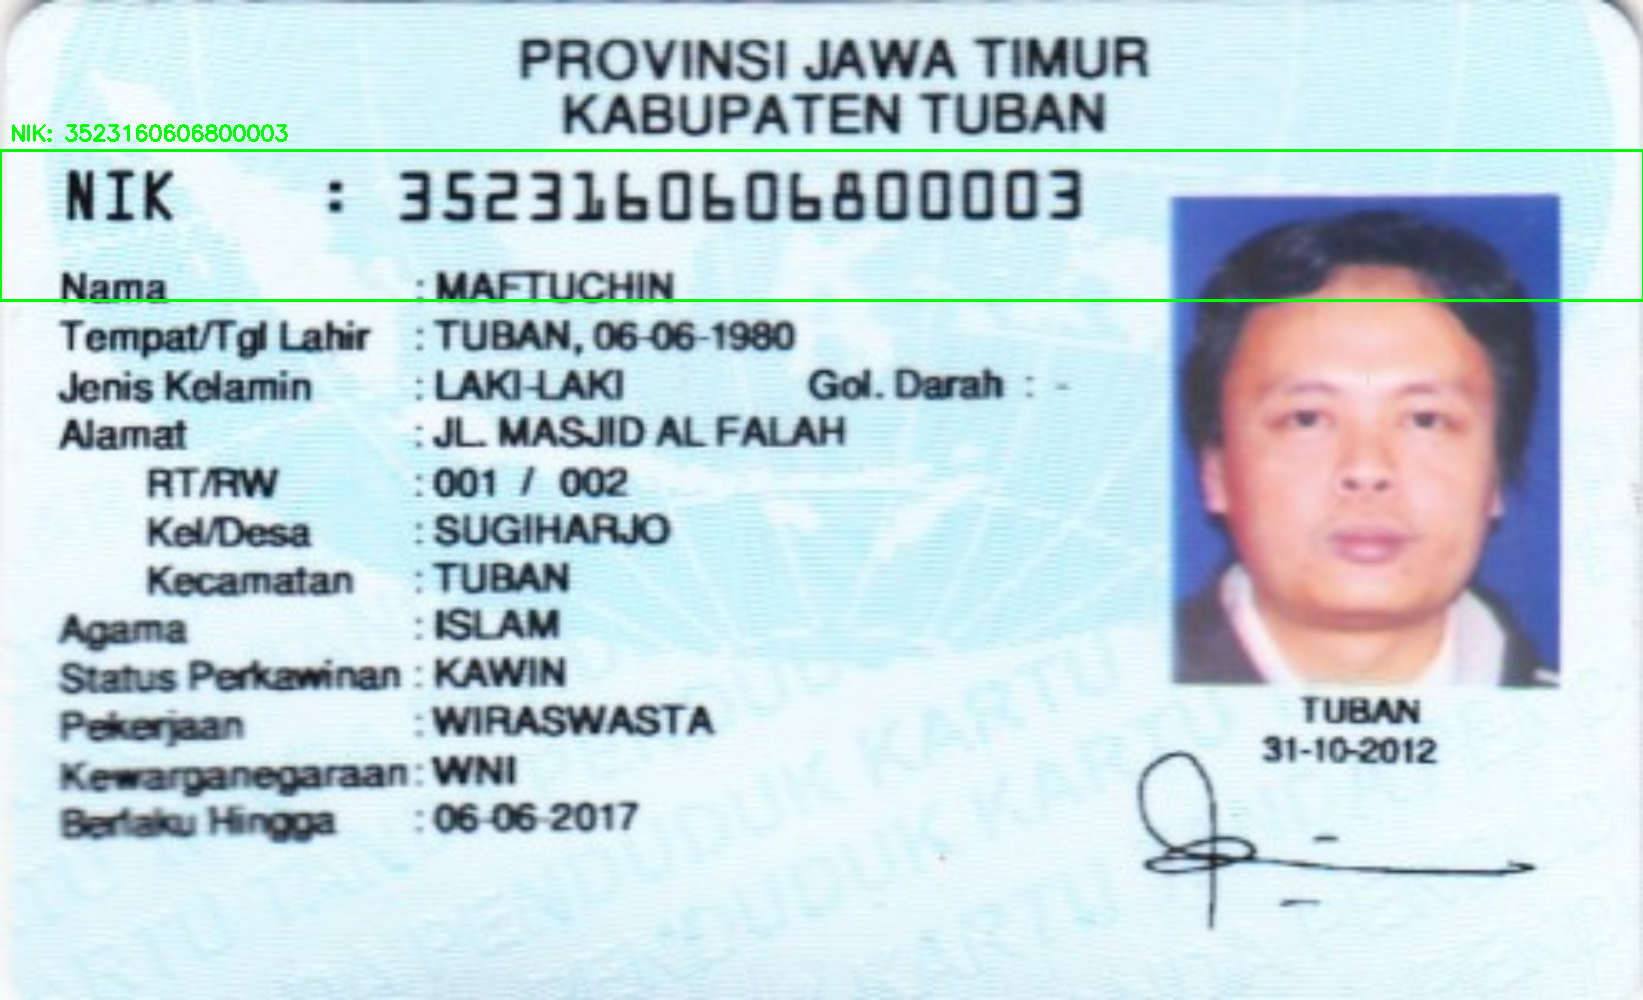

In [82]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import re
from google.colab.patches import cv2_imshow  # Khusus untuk display image di Colab

def enhance_image(image):
    # Resize image untuk konsistensi
    height = 1000
    aspect_ratio = image.shape[1] / image.shape[0]
    width = int(height * aspect_ratio)
    image = cv2.resize(image, (width, height))

    # Convert ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Increase contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Bilateral Filter untuk mengurangi noise sambil mempertahankan edge
    denoised = cv2.bilateralFilter(enhanced, 9, 75, 75)

    # Adaptive thresholding
    threshold = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

    # Morphological operations
    kernel = np.ones((1, 1), np.uint8)
    threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

    return threshold, image

def detect_nik(processed_img, original_img):
    height, width = processed_img.shape

    # Mencoba beberapa area ROI yang berbeda
    roi_areas = [
        (0.15, 0.15),
        (0.20, 0.15),
        (0.25, 0.15),
    ]

    best_nik = None
    best_roi = None

    for y_ratio, h_ratio in roi_areas:
        roi_y = int(height * y_ratio)
        roi_height = int(height * h_ratio)

        roi = processed_img[roi_y:roi_y+roi_height, 0:width]

        roi = cv2.GaussianBlur(roi, (3, 3), 0)
        roi_pil = Image.fromarray(roi)

        configs = [
            '--psm 6 -c tessedit_char_whitelist=0123456789',
            '--psm 7 -c tessedit_char_whitelist=0123456789',
            '--psm 8 -c tessedit_char_whitelist=0123456789'
        ]

        for config in configs:
            text = pytesseract.image_to_string(roi_pil, config=config)
            nik = clean_nik(text)

            if nik:
                best_nik = nik
                best_roi = (roi_y, roi_height)
                break

        if best_nik:
            break

    return best_nik, best_roi

def clean_nik(text):
    numbers = re.sub(r'\D', '', text)

    if len(numbers) > 0:
        print(f"Detected numbers: {numbers}")

    if len(numbers) >= 16:
        nik = numbers[:16]
        if nik.startswith(('1', '2', '3', '4', '5', '6', '7', '8', '9')):
            return nik
    return None

def display_result(image, nik, roi):
    if roi is None:
        return image

    result = image.copy()
    roi_y, roi_height = roi

    cv2.rectangle(result, (0, roi_y), (result.shape[1], roi_y+roi_height), (0, 255, 0), 2)

    if nik:
        cv2.putText(result, f"NIK: {nik}", (10, roi_y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    return result

def process_ktp(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Tidak dapat membaca gambar")

    processed_img, resized_original = enhance_image(image)

    cv2.imwrite('/content/processed_debug.jpg', processed_img)

    nik, roi = detect_nik(processed_img, resized_original)

    result = display_result(resized_original, nik, roi)

    return nik, result, processed_img

# Main execution
try:
    from google.colab import drive
    drive.mount('/content/drive')

    image_path = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp3.png'

    print("Memulai proses deteksi NIK...")
    nik, result_image, processed_img = process_ktp(image_path)

    print("\nMenampilkan gambar yang telah diproses:")
    cv2_imshow(processed_img)

    if nik:
        print(f"\nNIK terdeteksi: {nik}")
        print("Menampilkan hasil deteksi:")
        cv2_imshow(result_image)
    else:
        print("\nNIK tidak terdeteksi. Menampilkan gambar yang sudah diproses untuk debugging.")
        cv2_imshow(result_image)

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")